<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/WhichCelebYouAre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import os
from numpy.linalg import norm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
actorsName = []

files = open('/content/drive/MyDrive/DataSet/List of Actors.txt', 'r')

for f in files.readlines():
  if f is not None and f != '\n':
    actorsName.append(f.replace('\n',''))

print(actorsName)

['abhay_deol', 'adil_hussain', 'ajay_devgn', 'akshay_kumar', 'akshaye_khanna', 'amitabh_bachchan', 'amjad_khan', 'amol_palekar', 'amole_gupte', 'amrish_puri', 'anil_kapoor', 'annu_kapoor', 'anupam_kher', 'anushka_shetty', 'arshad_warsi', 'aruna_irani', 'ashish_vidyarthi', 'asrani', 'atul_kulkarni', 'ayushmann_khurrana', 'boman_irani', 'chiranjeevi', 'chunky_panday', 'danny_denzongpa', 'darsheel_safary', 'deepika_padukone', 'deepti_naval', 'dev_anand', 'dharmendra', 'dilip_kumar', 'dimple_kapadia', 'farhan_akhtar', 'farida_jalal', 'farooq_shaikh', 'girish_karnad', 'govinda', 'gulshan_grover', 'hrithik_roshan', 'huma_qureshi', 'irrfan_khan', 'jaspal_bhatti', 'jeetendra', 'jimmy_sheirgill', 'johnny_lever', 'kader_khan', 'kajol', 'kalki_koechlin', 'kamal_haasan', 'kangana_ranaut', 'kay_kay_menon', 'konkona_sen_sharma', 'kulbhushan_kharbanda', 'lara_dutta', 'madhavan', 'madhuri_dixit', 'mammootty', 'manoj_bajpayee', 'manoj_pahwa', 'mehmood', 'mita_vashisht', 'mithun_chakraborty', 'mohanlal'

In [6]:
#creating path to read images for every actor image folders

path = '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/'
pathfile = []

for i in actorsName:
  pathfile.append(path+i)
  
print(pathfile)

['/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/abhay_deol', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/adil_hussain', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/ajay_devgn', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/akshay_kumar', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/akshaye_khanna', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amitabh_bachchan', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amjad_khan', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amol_palekar', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amole_gupte', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/amrish_puri', '/content/drive/My Drive/DataSet/Bollywood Actor Images/Bolly

In [7]:
#Redaing images from path using glob


img1 = glob.glob('/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/irrfan_khan/*.jpg')
len(img1)

50

<class 'numpy.ndarray'>
[[[ 16  16  22]
  [ 16  16  22]
  [ 16  16  22]
  ...
  [225 200 184]
  [225 200 184]
  [225 200 184]]

 [[ 16  16  22]
  [ 16  16  22]
  [ 16  16  22]
  ...
  [225 200 184]
  [225 200 184]
  [225 200 184]]

 [[ 16  16  22]
  [ 16  16  22]
  [ 16  16  22]
  ...
  [225 200 184]
  [225 200 184]
  [225 200 184]]

 ...

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [100  49  16]
  [102  49  16]
  [100  49  16]]

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [100  49  16]
  [100  49  16]
  [100  49  16]]

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [100  49  16]
  [100  49  16]
  [100  49  16]]]


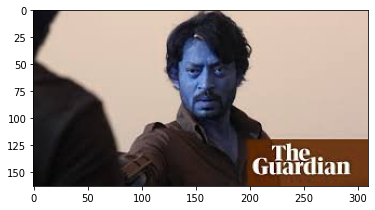

In [8]:
#read images using imread func 
img1 = cv2.imread(img1[5])
print(type(img1))
print(img1)
import matplotlib.pyplot as plt
plt.imshow(img1)

In [9]:
#Creating dataframe for every images and there name : columns {images, name}
images_list = []
name = []
i = 0
for p in pathfile:
  img_list = glob.glob(p+'/*.jpg')
  for img in img_list:
    images_list.append(img)
    name.append(actorsName[i])
  i = i+1


In [10]:
print(images_list[5])
print(name[5])

/content/drive/My Drive/DataSet/Bollywood Actor Images/Bollywood Actor Images/adil_hussain/3bdaf0bc3b.jpg
adil_hussain


In [11]:
len(images_list)

6688

In [12]:
df = pd.DataFrame({'Images' : images_list, 'Name':name})
df

,Images,Name
0,/content/drive/My Drive/DataSet/Bollywood Acto...,adil_hussain
1,/content/drive/My Drive/DataSet/Bollywood Acto...,adil_hussain
2,/content/drive/My Drive/DataSet/Bollywood Acto...,adil_hussain
3,/content/drive/My Drive/DataSet/Bollywood Acto...,adil_hussain
4,/content/drive/My Drive/DataSet/Bollywood Acto...,adil_hussain
...,...,...
6683,/content/drive/My Drive/DataSet/Bollywood Acto...,zeenat_aman
6684,/content/drive/My Drive/DataSet/Bollywood Acto...,zeenat_aman
6685,/content/drive/My Drive/DataSet/Bollywood Acto...,zeenat_aman
6686,/content/drive/My Drive/DataSet/Bollywood Acto...,zeenat_aman


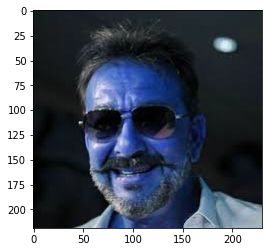

In [13]:
plt.imshow(cv2.imread(df['Images'][5600]))

In [14]:
df['Name'].value_counts()

nargis             50
priyanka_chopra    50
ranbir_kapoor      50
ramya_krishnan     50
rakhee_gulzar      50
                   ..
jaspal_bhatti      50
irrfan_khan        50
huma_qureshi       50
hrithik_roshan     50
adil_hussain       38
Name: Name, Length: 134, dtype: int64

In [15]:
#Images resize

img2 = cv2.imread(images_list[5])
img2.shape
img2 = cv2.resize(img2, (224,224))
img2.shape

(224, 224, 3)

In [16]:
images_array = []
images_array

[]

In [17]:
images_array = []

for img3 in tqdm(images_list):
  img3 = cv2.imread(img3)
  img3 = cv2.resize(img3, (224,224))
  images_array.append(img3)

print(images_array[3])

100%|██████████| 6688/6688 [26:07<00:00,  4.27it/s]

[[[ 55  65  95]
  [ 58  68  98]
  [ 62  72 102]
  ...
  [105 226 240]
  [100 223 237]
  [100 223 237]]

 [[ 47  57  87]
  [ 56  65  96]
  [ 63  73 103]
  ...
  [104 226 240]
  [102 225 239]
  [102 225 239]]

 [[ 50  60  90]
  [ 54  64  94]
  [ 58  68  98]
  ...
  [104 226 240]
  [103 226 240]
  [103 226 240]]

 ...

 [[ 64  89 128]
  [ 77 144 189]
  [ 64 161 215]
  ...
  [ 95 193 199]
  [ 96 194 200]
  [ 96 194 200]]

 [[ 66  92 129]
  [ 77 147 190]
  [ 66 165 216]
  ...
  [ 94 194 199]
  [ 96 196 201]
  [ 96 196 201]]

 [[ 59  89 123]
  [ 79 154 198]
  [ 62 163 215]
  ...
  [ 91 190 198]
  [ 96 194 199]
  [ 92 190 196]]]


In [18]:
#dimension changing of images to 4D array which s acceptabele by keras lib

images_array_dims = []
for img4 in tqdm(images_array):
  img4 = np.expand_dims(img4,axis = 0)
  images_array_dims.append(img4)

print(images_array_dims[2].shape)


100%|██████████| 6688/6688 [00:00<00:00, 145455.37it/s]

(1, 224, 224, 3)


In [19]:
outputfile = open('images_array_dims.pkl', 'wb')
pickle.dump(images_array_dims, outputfile)
outputfile.close()

In [21]:
import os
os.listdir()

['.config', 'drive', 'images_array_dims.pkl', 'sample_data']

In [59]:
from google.colab import files
files.download('images_array_dims.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
import keras
from keras.applications.resnet import ResNet50 
from keras.applications.resnet import preprocess_input

from keras.layers import GlobalMaxPooling2D 


In [39]:
model = ResNet50(include_top = False, weights='imagenet')
model.trainable = False

model = keras.Sequential([model,GlobalMaxPooling2D()])


In [43]:
#now predict the output for first photo, 
pred1 = model.predict(preprocess_input(images_array_dims[0]))
pred1.shape


(1, 2048)

In [44]:
pred1

array([[1.7345965 , 7.3371496 , 1.197293  , ..., 2.6937442 , 0.44821393,
        2.8665588 ]], dtype=float32)

In [45]:
#flatten this data to only single list like [], 
pred1 = pred1.flatten()
pred1.shape

(2048,)

In [47]:
#!pip install linalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for linalg: filename=linalg-1.0.4-py3-none-any.whl size=6293 sha256=a283d32dff36d2d8a9b751be26de186295914b2931dfcbe71beebb3ed71e5187
  Stored in directory: /root/.cache/pip/wheels/95/b7/4f/80270f2a339ca90d7abee59235fba6650748e505fc990206f9
Successfully built linalg


In [50]:
#we need to normalised the data to reduce computtion time, so here we uses norm fuction of linear algebra package
from numpy.linalg import norm
pred1/norm(pred1)


array([0.00506203, 0.02141184, 0.00349403, ..., 0.00786109, 0.00130801,
       0.00836541], dtype=float32)

In [54]:
#function making to perform above task for every images data in images_array_dims

#feature_list to hold features

feature_list = []

def feature_extraction(img_array):
  img_array = preprocess_input(img_array)
  img_array = model.predict(img_array)
  img_array = img_array.flatten()
  img_array = img_array/norm(img_array)
  feature_list.append(img_array)
  


In [56]:
#main function to call feature extraction

for img5 in tqdm(images_array_dims):
  feature_extraction(img5)

print(len(feature_list))

100%|██████████| 6688/6688 [27:07<00:00,  4.11it/s]

6691


In [57]:
outputfile = open('feature_list.pkl', 'wb')
pickle.dump(feature_list, outputfile)

In [58]:
files.download('feature_list.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>